<a href="https://colab.research.google.com/github/HermelaDev/Cats-vs-Dogs_Image_Classification_DL_CNN/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2025-07-17 13:32:19--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.218.186.12, 2600:1409:3c00:c80::317f, 2600:1409:3c00:c8c::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.218.186.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip.1’

kagglecatsanddogs_5 100%[===================>] 786.67M  87.0MB/s    in 8.1s    

2025-07-17 13:32:27 (97.2 MB/s) - ‘kagglecatsanddogs_5340.zip.1’ saved [824887076/824887076]



In [16]:
#!unzip kagglecatsanddogs_5340.zip

## Importing libraries

In [17]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os # Used for Listing image files, loading data from directories, creating folders.
import tqdm # A progress bar library: Used for Showing progress when loading images or training in a loop.
import random # For generating random numbers. Used for Randomly selecting or shuffling images, setting seeds for reproducibility.
from keras.preprocessing.image import load_img # A tool from Keras to load images and convert them to arrays. Used for Reading image files and resizing them to feed into the model.
warnings.filterwarnings('ignore') # Tells Python to hide any warning messages.

## Create a Dataframe

In [18]:
input_path = []  # List to store image file paths
label = []       # List to store image labels (0 = Cat, 1 = Dog)

for class_name in os.listdir('PetImages'):  # Loop through 'Cat' and 'Dog' folders
    folder_path = os.path.join('PetImages', class_name)  # Full path to the folder

    if not os.path.isdir(folder_path):  # Skip if it's not a folder
        continue

    for path in os.listdir(folder_path):  # Loop through image files in the folder
        file_path = os.path.join('PetImages', class_name, path)  # Full image path
        input_path.append(file_path)  # Add image path to list

        if class_name == 'Cat':
            label.append(0)  # Label 0 for Cat
        else:
            label.append(1)  # Label 1 for Dog

df = pd.DataFrame({'Image': input_path, 'Label': label})  # Create DataFrame
df.head()


,Image,Label
0,PetImages/Cat/7851.jpg,0
1,PetImages/Cat/7400.jpg,0
2,PetImages/Cat/9208.jpg,0
3,PetImages/Cat/158.jpg,0
4,PetImages/Cat/3210.jpg,0


In [19]:
df.shape

(25002, 2)

In [20]:
# Import the Image class for opening and verifying image files
from PIL import Image

- Image is a class from the PIL (Pillow) library.

- We use it to open, check, or manipulate images (like resizing, verifying, converting formats, etc.).

## Detect and Exclude Non-JPG and Corrupt Images

In [21]:
bad_images = []  # List to store paths of invalid or unreadable images

for image in df['Image']:  # Loop through each image path in the DataFrame

    if not image.lower().endswith('.jpg'):  # Check if the file does not end with '.jpg'
        bad_images.append(image)            # Add non-jpg file to the list of bad images
        continue                            # Skip further checks and move to the next image

    try:
        img = Image.open(image)  # Try to open the image file
        img.verify()             # Verify that the image is not corrupted or incomplete
    except:
        bad_images.append(image)  # If an error occurs (image is corrupted), add to bad images

bad_images

# Remove all bad files from the DataFrame
df = df[~df['Image'].isin(bad_images)].reset_index(drop=True)

## Exploratory Data Analysis

> Visualizing Dog Images in a Grid


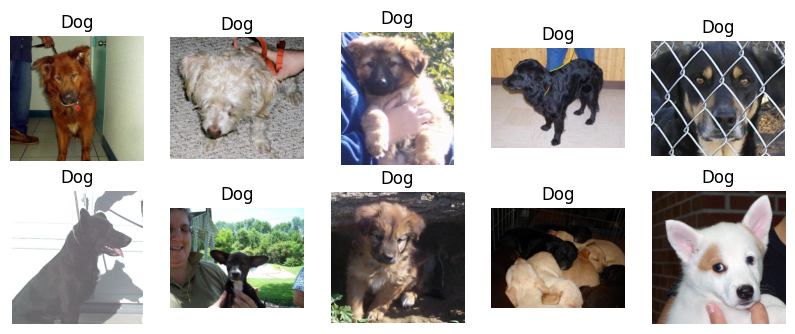

In [22]:
# Display a grid of 10 random dog images to understand the content of the dataset

plt.figure(figsize=(10, 10))  # Create a large figure to hold 10 images in a grid

# Filter the DataFrame to get paths of all dog images (label == 1)
temp = df[df['Label'] == 1]['Image']

# Choose a random starting point in the list
start = random.randint(0, len(temp) - 10)

# Select 25 consecutive image paths from that starting point
files = temp[start:start + 10]

# Loop through each selected image and plot it
for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)      # Create a 5x5 grid position for the image
    img = load_img(file)              # Load the image
    img = np.array(img)               # Convert to a NumPy array for plotting
    plt.imshow(img)                   # Display the image
    plt.title('Dog')                  # Set title as 'Dog'
    plt.axis('off')                   # Hide axes for cleaner look


### Visualizing Cat Images in a Grid

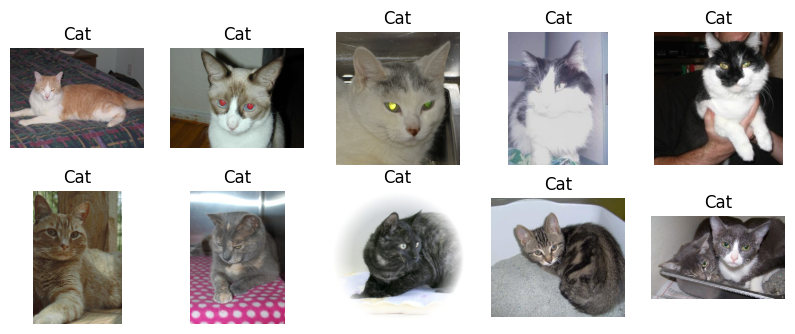

In [23]:
# Display a grid of 10 random CAT images to understand the content of the dataset

plt.figure(figsize=(10, 10))  # Create a large figure to hold 10 images in a grid

# Filter the DataFrame to get paths of all cata images (label == 0)
temp = df[df['Label'] == 0]['Image']

# Choose a random starting point in the list
start = random.randint(0, len(temp) - 10)

# Select 10 consecutive image paths from that starting point
files = temp[start:start + 10]

# Loop through each selected image and plot it
for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)      # Create a 5x5 grid position for the image
    img = load_img(file)              # Load the image
    img = np.array(img)               # Convert to a NumPy array for plotting
    plt.imshow(img)                   # Display the image
    plt.title('Cat')                  # Set title as 'Cat'
    plt.axis('off')                   # Hide axes for cleaner look


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   24998 non-null  object
 1   Label   24998 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.7+ KB


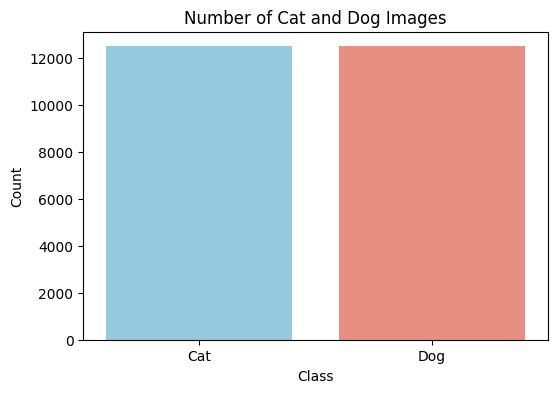

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df, palette={'0': 'skyblue', '1': 'salmon'})

# Customize the plot
plt.title("Number of Cat and Dog Images")
plt.xticks([0, 1], ['Cat', 'Dog'])
plt.xlabel("Class")
plt.ylabel("Count")

# Display
plt.show()

- We can observe an equal distribution of both classes.

## Split Dataset and Prepare for Data Generator

In [26]:
# Splitting the input
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)


### The function train_test_split() returns a tuple of two parts:
                  (train_data, test_data)
We use train_test_split to divide the dataset into training and testing sets.
80% of the data is used to train the model, and 20% is kept aside to test how well the model performs on unseen data.

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training Data Generator (with Augmentation)
train_generator = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values (0–255 → 0–1)
    rotation_range=40,       # Randomly rotate images up to 40 degrees
    shear_range=0.2,         # Shear (slant) the image
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Flip image horizontally
    fill_mode='nearest'      # Fill in missing pixels after transformations
)

# Validation Data Generator (Only Rescale, No Augmentation)
val_generator = ImageDataGenerator(
    rescale=1./255           # Just normalize, no changes to images
)


Image generators are used to load images in batches and prepare them for the model.
The training generator performs data augmentation (random changes like rotation, zoom, etc.) to help the model generalize better and reduce overfitting.
The validation generator only rescales the images, as we want to test on the original data without any changes.

In [33]:
train['Label'] = train['Label'].astype(str)
test['Label'] = test['Label'].astype(str)


train_iterator = train_generator.flow_from_dataframe(
    dataframe=train,               # the training data
    x_col='Image',                # column with image file paths
    y_col='Label',                 # column with labels
    target_size=(128, 128),        # resize all images to 128x128
    batch_size=512,                # how many images to load at once
    class_mode='binary'            # use 'binary' since it's a 2-class problem (dog/cat)
)

val_iterator = val_generator.flow_from_dataframe(
    dataframe=test,                # the validation data
    x_col='Image',
    y_col='Label',
    target_size=(128, 128),
    batch_size=512,
    class_mode='binary'
)


Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Our DataFrames is now connected to the generators using flow_from_dataframe().
This tells the generator where to find the image file paths (x_col) and labels (y_col).
The images are resized to 128×128 pixels to ensure consistency.
Since we are doing binary classification (dog vs. cat), we set class_mode to 'binary'.

In [34]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


A Sequential model is used to build a CNN (Convolutional Neural Network) step by step.

Here's what each layer does:

- Conv2D(16, (3,3), ...): This is the first convolutional layer. It uses 16 filters with size 3×3 to detect features like edges or shapes from the input image.

- MaxPool2D((2,2)): This is a pooling layer that reduces the size of the feature maps, keeping important information while reducing computation.

- Then we repeat:

  - A Conv2D layer with more filters (32 and then 64) to capture more complex patterns.

  - Each Conv2D is followed by a MaxPool2D layer to shrink the image representation.

- Flatten(): Turns the 3D output from the convolution layers into a 1D vector so it can go into the dense (fully connected) layers.

- Dense(512, activation='relu'): A fully connected layer with 512 units that learns high-level patterns.

- Dense(1, activation='sigmoid'): The final output layer. Since we are doing binary classification (dog vs. cat), we use 1 neuron with a sigmoid activation, which gives a probability between 0 and 1.

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

model.compile():
The compile() function prepares the neural network model for training. It specifies how the model should learn and what it should evaluate during training and testing.

1. optimizer='adam'
- The Adam optimizer is selected for adjusting the model's internal weights during training.

- Adam combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp.

- It works efficiently for most problems and helps the model converge faster.

2. loss='binary_crossentropy'
- Binary cross-entropy is used as the loss function because the task is a binary classification problem (i.e., predicting two classes such as dog or cat).

- It measures how well the predicted outputs match the actual labels (which are either 0 or 1).

- The loss value will be minimized during training to improve performance.

3. metrics=['accuracy']
- Accuracy is used as the evaluation metric.

- During training and validation, it tracks how often the model’s predictions match the true labels.

- This helps to monitor the model’s performance over time.

🔍 Explanation of model.summary()

    - The summary() method prints a detailed overview of the model’s architecture. It includes:

- A list of all layers used in the model (e.g., Conv2D, MaxPooling, Flatten, Dense)

- The shape of the output from each layer

- The number of parameters (weights and biases) in each layer

- The total number of trainable parameters in the entire model

- This summary helps in understanding the structure and complexity of the model.

## Visualization of Result

In [36]:
# Train the model using training data and validate using validation data
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.5228 - loss: 0.8022 - val_accuracy: 0.6490 - val_loss: 0.6413
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.6377 - loss: 0.6405 - val_accuracy: 0.6476 - val_loss: 0.6340
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.6893 - loss: 0.5894 - val_accuracy: 0.6464 - val_loss: 0.6374
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.6711 - loss: 0.6107 - val_accuracy: 0.6820 - val_loss: 0.5837
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.7125 - loss: 0.5602 - val_accuracy: 0.7424 - val_loss: 0.5106
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.7292 - loss: 0.5330 - val_accuracy: 0.7590 - val_loss: 0.4991
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.7443 - loss: 0.5223 - val_accuracy: 0.7566 - val_loss: 0.4924
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.7542 - loss: 0.4994 - val_accuracy: 0.7754 - v

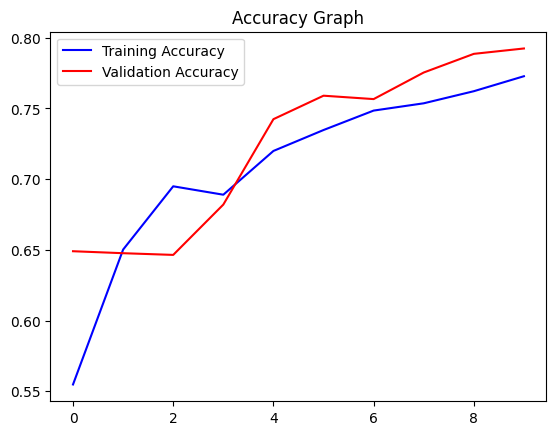

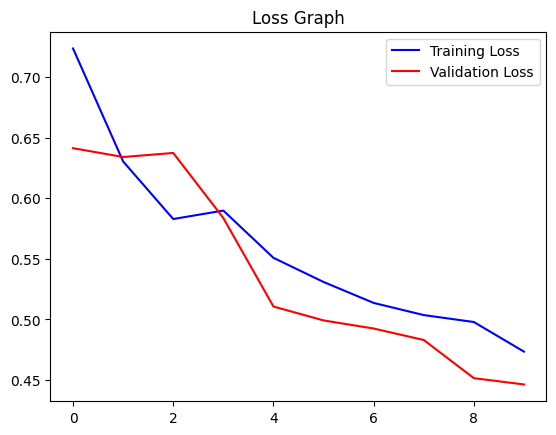

In [37]:
# Extract training and validation accuracy from the training history
acc = history.history['accuracy']            # Accuracy on training set
val_acc = history.history['val_accuracy']    # Accuracy on validation set
epochs = range(len(acc))                     # Epochs range for plotting

# Plotting training vs validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accuracy')       # Blue line for training accuracy
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy') # Red line for validation accuracy
plt.title('Accuracy Graph')                                 # Graph title
plt.legend()                                                # Show legend
plt.figure()                                                # Create a new figure for the next plot

# Extract training and validation loss from the training history
loss = history.history['loss']              # Loss on training set
val_loss = history.history['val_loss']      # Loss on validation set

# Plotting training vs validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')          # Blue line for training loss
plt.plot(epochs, val_loss, 'r', label='Validation Loss')    # Red line for validation loss
plt.title('Loss Graph')                                     # Graph title
plt.legend()                                                # Show legend
plt.show()                                                  # Display all plots


## Test with Real Image

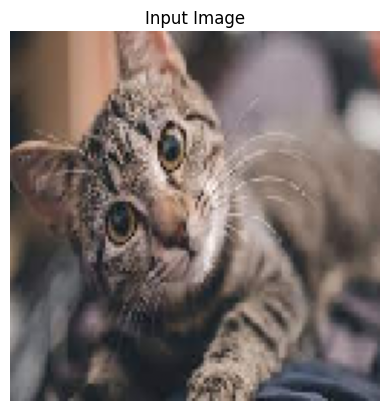

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label: Cat


In [42]:
image_path = "/content/wuru.jpeg"
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0  # normalize the image
img = img.reshape(1, 128, 128, 3)  # add batch dimension

# Show the image
plt.imshow(img.reshape(128, 128, 3))
plt.title("Input Image")
plt.axis('off')
plt.show()

# Predict
pred = model.predict(img)
label = 'Dog' if pred[0] > 0.5 else 'Cat'
print(f"Predicted Label: {label}")


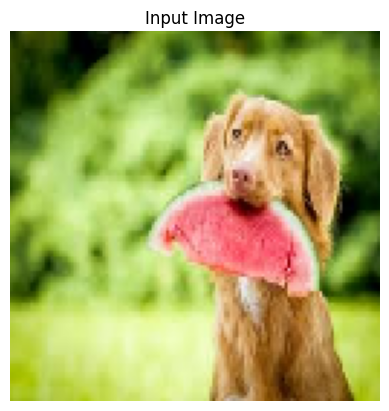

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Label: Dog


In [43]:
from tensorflow.keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/download.jpeg"
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0  # normalize the image
img = img.reshape(1, 128, 128, 3)  # add batch dimension

# Show the image
plt.imshow(img.reshape(128, 128, 3))
plt.title("Input Image")
plt.axis('off')
plt.show()

# Predict
pred = model.predict(img)
label = 'Dog' if pred[0] > 0.5 else 'Cat'
print(f"Predicted Label: {label}")